In [1]:
!pip install tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from tqdm import tqdm
import sys
tf.__version__

'1.8.0'

In [0]:
# # Enable eager execution
# tf.enable_eager_execution()
# tfe = tf.contrib.eager

In [0]:
# get our dataset to work on
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Image shape: ", train_images.shape)

Image shape:  (60000, 28, 28)


In [0]:
def plot_images(img, num):
  fig, axarr = plt.subplots(1, num)

  for i in range(num):
      axarr[i].imshow(img[i], cmap="gray")
      axarr[i].axis('off')

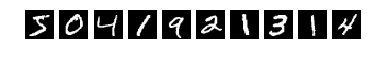

In [5]:
plot_images(train_images, 10)

In [0]:
# Preprocessing of Images
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)
with tf.device('/cpu:0'):
  
  # Convert the array to float32 as opposed to uint8
  train_images = train_images.astype(np.float32).reshape(-1, 28, 28, 1)
  test_images = test_images.astype(np.float32).reshape(-1, 28, 28, 1)

  # Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
  train_images /= 255
  test_images /=  255

  # Flatten all Images
#   X = tf.reshape(train_images, [-1, 28*28])

  NUM_DIGITS = 10

  train_labels  = tf.one_hot(train_labels, NUM_DIGITS)

  test_labels = tf.one_hot(test_labels, NUM_DIGITS)

In [0]:
# Convert the inputs to a Dataset.
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# Shuffle, repeat, and batch the examples.
dataset = dataset.shuffle(10000).batch(1000)
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()

## CNN Model

In [0]:
X_train = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_labels = tf.placeholder(tf.float32, [None, 10])

In [0]:
# layer-1: CNN
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
B1 = tf.Variable(tf.ones([4])/10)

# layer-2: CNN
W2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
B2 = tf.Variable(tf.ones([8])/10)

# layer-3: CNN
W3 = tf.Variable(tf.truncated_normal([4, 4, 8, 12], stddev=0.1))
B3 = tf.Variable(tf.ones([12])/10)

stride = 1
Y1 = tf.nn.relu(tf.nn.conv2d(X_train, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)

stride = 2
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)

Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

YY = tf.reshape(Y3, [-1, 7*7*12])

# layer-4: FC
W4 = tf.Variable(tf.truncated_normal([7*7*12, 200], stddev=0.1))
B4 = tf.Variable(tf.ones([200])/10)

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)

# layer-5: Output
W5 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [0]:
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels=Y_labels, logits=Ylogits))*100

In [0]:
# step for variable learning rate
step = tf.placeholder(tf.int32)
lr = 0.0001 +  tf.train.exponential_decay(0.003, step, 2000, 1/math.e)

In [0]:
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

In [0]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
init = tf.global_variables_initializer()


epoch:  0


100%|██████████| 60/60 [00:02<00:00, 24.71it/s]


epoch:  1



100%|██████████| 60/60 [00:01<00:00, 42.70it/s]


epoch:  2



100%|██████████| 60/60 [00:01<00:00, 41.90it/s]


epoch:  3



100%|██████████| 60/60 [00:01<00:00, 42.72it/s]


epoch:  4



100%|██████████| 60/60 [00:01<00:00, 41.55it/s]


epoch:  5



100%|██████████| 60/60 [00:01<00:00, 41.52it/s]



epoch:  6


100%|██████████| 60/60 [00:01<00:00, 40.24it/s]


epoch:  7



100%|██████████| 60/60 [00:01<00:00, 41.10it/s]


epoch:  8



100%|██████████| 60/60 [00:01<00:00, 41.20it/s]


epoch:  9



100%|██████████| 60/60 [00:01<00:00, 42.18it/s]


epoch:  10



100%|██████████| 60/60 [00:01<00:00, 42.63it/s]


epoch:  11



100%|██████████| 60/60 [00:01<00:00, 42.73it/s]


epoch:  12



100%|██████████| 60/60 [00:01<00:00, 42.28it/s]


epoch:  13



100%|██████████| 60/60 [00:01<00:00, 41.32it/s]


epoch:  14



100%|██████████| 60/60 [00:01<00:00, 40.34it/s]


epoch:  15



100%|██████████| 60/60 [00:01<00:00, 40.62it/s]


epoch:  16



100%|██████████| 60/60 [00:01<00:00, 42.86it/s]


epoch:  17



100%|██████████| 60/60 [00:01<00:00, 39.91it/s]


epoch:  18



100%|██████████| 60/60 [00:01<00:00, 41.02it/s]


epoch:  19



100%|██████████| 60/60 [00:01<00:00, 41.11it/s]


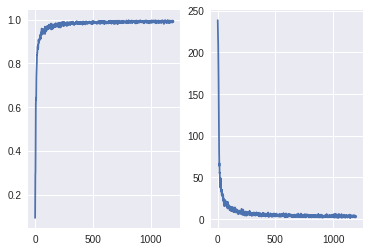

In [15]:
# plt.rcParams["figure.figsize"] = [8, 4]
fig, axarr = plt.subplots(1, 2)
EPOCHS = 20


mat_acc = []
mat_loss = []
with tf.device('/gpu:0'):
  sess = tf.Session()
  sess.run(init)
  for j in range(EPOCHS):
    print('\nepoch: ', j)
    sys.stdout.flush()
    sess.run(iterator.initializer)
    for i in tqdm(range(60)):
        batch_X, batch_Y = sess.run(next_element)
        acc, _, l = sess.run([accuracy,optimizer, loss], 
                                feed_dict={X_train: batch_X, Y_labels: batch_Y, step: 600*j+i})
        mat_acc.append(acc)
        mat_loss.append(l)
axarr[0].plot(mat_acc)
axarr[1].plot(mat_loss)
fig.canvas.draw()


In [0]:
# Convert the inputs to a Dataset.
dataset_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
# # Shuffle, repeat, and batch the examples.
dataset_test = dataset_test.batch(10000)
iterator_new = dataset_test.make_one_shot_iterator()
next_element2 = iterator_new.get_next()

In [17]:
x ,y = sess.run(next_element2)
a = sess.run([accuracy], feed_dict={X_train: x, Y_labels: y})
print("test accuracy: ", a)

test accuracy:  [0.9867]


## Save our Session

In [24]:
saver = tf.train.Saver()

save_path = saver.save(sess, "session/model.ckpt")
print("Model saved in path: %s" % save_path)

Model saved in path: session/model.ckpt


In [27]:
!zip -r model.zip session

  adding: session/ (stored 0%)
  adding: session/model.ckpt.index (deflated 43%)
  adding: session/model.ckpt.meta (deflated 92%)
  adding: session/checkpoint (deflated 42%)
  adding: session/model.ckpt.data-00000-of-00001 (deflated 12%)


## And Download it

In [0]:
from google.colab import files
files.download('model.zip')

In [0]:
tf.reset_default_graph()

In [95]:
# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 7.9 GB  | Proc size: 5.2 GB
GPU RAM Free: 503MB | Used: 10936MB | Util  96% | Total 11439MB
